# (very short) Introduction to Keras

In [1]:
import keras
from keras.preprocessing import image

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def preprocess(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x



Using TensorFlow backend.


### Keras model as a classificator

In [2]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

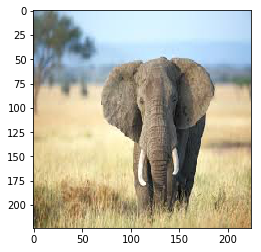

In [3]:
IMAGE_PATH = './resources/elephant.jpeg'
img, x = preprocess(IMAGE_PATH)

plt.imshow(img, 'gray')
plt.show()

In [4]:
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print("rank\tclass\t\t\tprobability")
pred1, pred2, pred3 = decode_predictions(preds, top=3)[0]
print("%d\t%s\t%0.4f" % (1, pred1[1], pred1[2]))
print("%d\t%s\t\t\t%0.4f" % (2, pred2[1], pred2[2]))
print("%d\t%s\t\t%0.4f" % (3, pred3[1], pred3[2]))



rank	class			probability
1	African_elephant	0.7422
2	tusker			0.2004
3	Indian_elephant		0.0573


### Keras model as a feature extractor

In [5]:
from keras.applications.vgg16 import VGG16, preprocess_input

model = VGG16(weights="imagenet", include_top=False, pooling = "avg")


In [6]:
cnn_features = model.predict(x)
print(cnn_features.shape)

(1, 512)


#### For mor information, you can visit the official documentation:

https://keras.io/

https://keras.io/applications/

### Feature extractor with skimage hog

In [7]:
from skimage.feature import hog

# You can use default parameters
default_hog_features = hog(img)
print(default_hog_features.shape)

(54756,)


In [8]:
# Or change some of them. 
hog_features = hog(img, orientations=9, pixels_per_cell=(16,16),
                    cells_per_block=(3,3), visualize=False, multichannel=True)
print(hog_features.shape)

(11664,)
